# B18030 Tushar Goyal  B.Tech(CSE)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("landslide_data2_miss.csv")
df_c=pd.read_csv("landslide_data2_miss.csv")
df_c2=pd.read_csv("landslide_data2_miss.csv")
dfv=pd.read_csv("landslide_data2_original.csv")

In [3]:
df.head()

,dates,stationid,dispx,dispy,dispz,temperature,humidity,rain
0,08-07-2018,t10,0.000000,0.000000,0.000000,25.46875,82.18750,6.75
1,09-07-2018,t10,0.000000,0.000000,0.000000,26.19298,83.14912,1761.75
2,10-07-2018,t10,0.000000,0.000000,0.000000,25.17021,85.34043,652.50
3,11-07-2018,t10,-0.002835,0.003721,0.004961,NaN,87.68657,963.00
4,12-07-2018,t10,-0.002835,0.003721,0.004961,NaN,87.64615,254.25


In [4]:
df.shape

(945, 8)

In [5]:
dfv.shape

(945, 8)

In [6]:
col=list(df.columns)

In [7]:
col

['dates',
 'stationid',
 'dispx',
 'dispy',
 'dispz',
 'temperature',
 'humidity',
 'rain']

# How to count the NaN values in a column in pandas DataFrame?
- We find number of NaN, so that if it is less than some threshold, we should drop that columns.
## can use the isna() method (or it's alias isnull())

### The isna method returns a DataFrame of all boolean values (True/False). 

In [8]:
arr={}
for item in col:
    arr[item]=[df[item].isna().sum()]

In [9]:
arr

{'dates': [0],
 'stationid': [22],
 'dispx': [51],
 'dispy': [51],
 'dispz': [53],
 'temperature': [45],
 'humidity': [48],
 'rain': [16]}

In [10]:
pd.DataFrame(arr)

,dates,stationid,dispx,dispy,dispz,temperature,humidity,rain
0,0,22,51,51,53,45,48,16


In [11]:
df['countofnan']=df.isnull().sum(axis=1)

In [12]:
df.head()

,dates,stationid,dispx,dispy,dispz,temperature,humidity,rain,countofnan
0,08-07-2018,t10,0.000000,0.000000,0.000000,25.46875,82.18750,6.75,0
1,09-07-2018,t10,0.000000,0.000000,0.000000,26.19298,83.14912,1761.75,0
2,10-07-2018,t10,0.000000,0.000000,0.000000,25.17021,85.34043,652.50,0
3,11-07-2018,t10,-0.002835,0.003721,0.004961,NaN,87.68657,963.00,1
4,12-07-2018,t10,-0.002835,0.003721,0.004961,NaN,87.64615,254.25,1


In [13]:
unique_miss_values,count=np.unique(df.countofnan,return_counts=True)
print(unique_miss_values,count)

[0 1 2 3 4 5 6] [798  87  25  10  10  11   4]


Text(0, 0.5, 'Number of corresponding tuples =>')

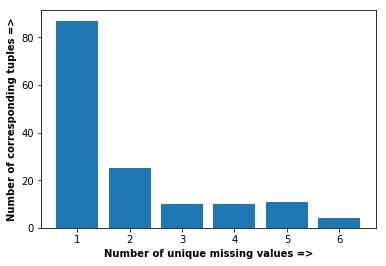

In [14]:
plt.bar(unique_miss_values[1:],count[1:])
plt.xlabel("Number of unique missing values =>",fontweight='bold')
plt.ylabel("Number of corresponding tuples =>",fontweight='bold')

In [15]:
to_drop=df[df.countofnan>=4].index

In [16]:
to_drop

Int64Index([ 41,  42,  43,  44,  45, 158, 159, 172, 184, 189, 207, 208, 209,
            233, 366, 367, 368, 369, 638, 651, 688, 694, 833, 939, 940],
           dtype='int64')

### Removing rows/columns from a DataFrame
#### We can remove a row or a column using the .drop() function. In doing this, we have to specify the axis=0 for row, and axis=1 for column.
- It is important to note that Pandas does not permanently drop a row/column whenever you use the .drop() method unless you tell it to do so. This is so because Pandas doesn’t want you to accidentally loose your data.
- To permanently delete a row/column, you have to set inplace=True .

In [17]:
df.drop(to_drop,inplace=True)
dfv.drop(to_drop,inplace=True)

In [18]:
df[df.countofnan>=6].index

Int64Index([], dtype='int64')

In [19]:
print(df.shape)

(920, 9)


In [20]:
print(dfv.shape)

(920, 8)


##### Missing Data
A lot of times, when you’re using Pandas to read-in data and there are missing points, Pandas will automatically fill-in those missing points with a NaN or Null value. Hence, __we can either drop those auto-filled values using .dropna() or fill them using.fillna().__
- df.dropna() without any parameter  #drop all rows that have any NaN values
- Using .dropna() method, we are telling Pandas to drop any row or column with one or more missing values. To drop a row, use.dropna(axis=0) and .dropna(axis=1) to drop a column.
- Note that if you do not specify the axis, Pandas assumes you are dropping a row by default

__here are the parameters you can include in dropna:__

- Axis: Specifies to drop by row or column. 0 means row, 1 means column.
- How: Accepts one of two possible values: any or all. This will either drop an axis which is completely empty (all), or an axis with even just a single empty cell (any).
- Thresh: Here's an interesting one: thresh accepts an integer, and will drop an axis only if that number threshold of empty cells is breached.
- Subset: Accepts an array of which axis' to consider, as opposed to considering all by default.
- Inplace: If you haven't come across inplace yet, learn this now: changes will NOT be made to the DataFrame you're touching unless this is set to True. It's False by default.

In [21]:
ind=df['stationid'][df.stationid.isnull()].index

In [22]:
df.drop(ind,inplace=True)
dfv.drop(ind,inplace=True)

In [23]:
df=df.drop('countofnan',axis=1)

In [24]:
df_ad=df.copy()
df_t1=df.copy()
df_t2=df.copy()
df_t3=df.copy()

In [25]:
df.shape

(898, 8)

In [26]:
dfv.shape

(898, 8)

## df.dropna(subset=['quality'],inplace=True)

In [27]:
arr2={}
for item in col:
    arr2[item]=[df[item].isna().sum()]

In [28]:
pd.DataFrame(arr2)

,dates,stationid,dispx,dispy,dispz,temperature,humidity,rain
0,0,0,33,27,29,20,29,4


In [29]:
df.isna().sum().sum()

142

In [30]:
for item in col[2:]:
    df[item].fillna(df[item].median(),inplace=True)
# df['countofnan']=df.isnull().sum(axis=1)

In [31]:
df.head()

,dates,stationid,dispx,dispy,dispz,temperature,humidity,rain
0,08-07-2018,t10,0.000000,0.000000,0.000000,25.46875,82.18750,6.75
1,09-07-2018,t10,0.000000,0.000000,0.000000,26.19298,83.14912,1761.75
2,10-07-2018,t10,0.000000,0.000000,0.000000,25.17021,85.34043,652.50
3,11-07-2018,t10,-0.002835,0.003721,0.004961,22.26757,87.68657,963.00
4,12-07-2018,t10,-0.002835,0.003721,0.004961,22.26757,87.64615,254.25


In [32]:
dfo=pd.read_csv('landslide_data2_original.csv')

In [33]:
dfo.head()

,dates,stationid,dispx,dispy,dispz,temperature,humidity,rain
0,08-07-2018,t10,0.000000,0.000000,0.000000,25.46875,82.18750,6.75
1,09-07-2018,t10,0.000000,0.000000,0.000000,26.19298,83.14912,1761.75
2,10-07-2018,t10,0.000000,0.000000,0.000000,25.17021,85.34043,652.50
3,11-07-2018,t10,-0.002835,0.003721,0.004961,24.29851,87.68657,963.00
4,12-07-2018,t10,-0.002835,0.003721,0.004961,24.06923,87.64615,254.25


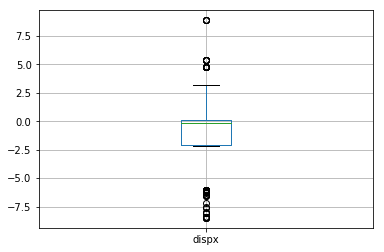

In [34]:
dfo.boxplot(column=['dispx'])

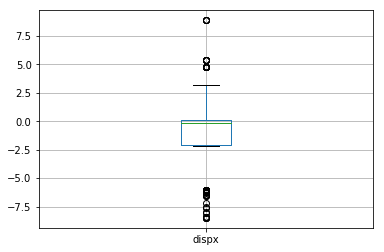

In [35]:
df.boxplot(column=['dispx'])

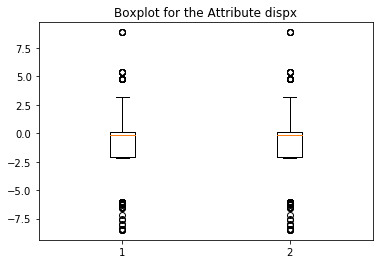

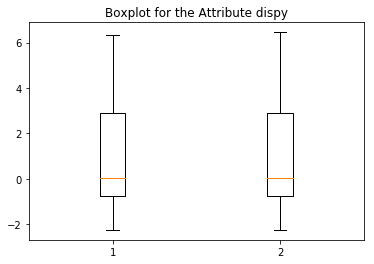

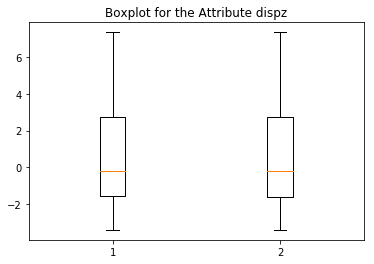

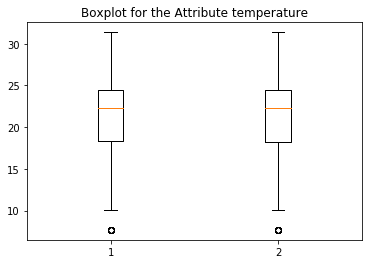

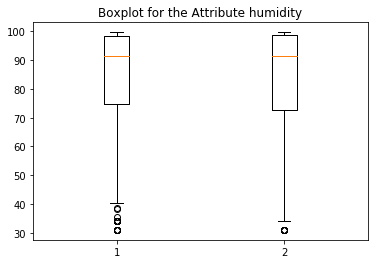

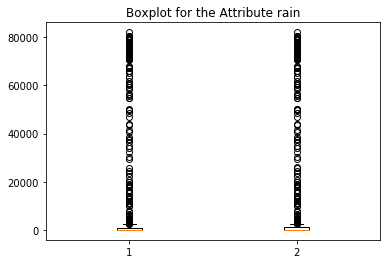

In [36]:
for att in col[2:]:
    plt.boxplot([df[att],dfo[att]])
    plt.title('Boxplot for the Attribute '+att)
    plt.show()
    

In [37]:
dfo_describe=dfo.agg(['mean','median','std'])
dfo_describe

,dispx,dispy,dispz,temperature,humidity,rain
mean,-0.838917,1.148107,0.687709,21.214888,83.479932,10701.538370
median,-0.141613,0.030477,-0.172586,22.272730,91.380950,18.000000
std,2.892552,2.652794,2.630815,4.355818,18.210065,24852.255288


In [38]:
df_describe=df.agg(['mean','median','std'])
df_describe

,dispx,dispy,dispz,temperature,humidity,rain
mean,-0.820205,1.132392,0.657865,21.225027,83.853340,10445.724677
median,-0.141613,0.032426,-0.219011,22.267570,91.341880,15.750000
std,2.879592,2.638225,2.611836,4.314868,17.774149,24554.577405


### How to replace NaNs by preceding values in pandas DataFrame?
- __You could use the fillna method on the DataFrame and specify the method as ffill (forward fill):__
- This method doesn't modify the DataFrame inplace - you'll need to rebind the returned DataFrame to a variable or else specify inplace=True:



In [39]:
for item in col[2:]:
    df_c[item].fillna(method='ffill',inplace=True)

In [40]:
df_c.head()

,dates,stationid,dispx,dispy,dispz,temperature,humidity,rain
0,08-07-2018,t10,0.000000,0.000000,0.000000,25.46875,82.18750,6.75
1,09-07-2018,t10,0.000000,0.000000,0.000000,26.19298,83.14912,1761.75
2,10-07-2018,t10,0.000000,0.000000,0.000000,25.17021,85.34043,652.50
3,11-07-2018,t10,-0.002835,0.003721,0.004961,25.17021,87.68657,963.00
4,12-07-2018,t10,-0.002835,0.003721,0.004961,25.17021,87.64615,254.25


In [41]:
dfc_describe=df_c.agg(['mean','median','std'])
dfc_describe

,dispx,dispy,dispz,temperature,humidity,rain
mean,-0.818827,1.144754,0.675796,21.185974,83.631135,10431.167735
median,-0.141613,0.030477,-0.219011,22.296610,91.377780,18.000000
std,2.894063,2.654738,2.633149,4.394280,18.032444,24505.938128


In [42]:
dfv.head()

,dates,stationid,dispx,dispy,dispz,temperature,humidity,rain
0,08-07-2018,t10,0.000000,0.000000,0.000000,25.46875,82.18750,6.75
1,09-07-2018,t10,0.000000,0.000000,0.000000,26.19298,83.14912,1761.75
2,10-07-2018,t10,0.000000,0.000000,0.000000,25.17021,85.34043,652.50
3,11-07-2018,t10,-0.002835,0.003721,0.004961,24.29851,87.68657,963.00
4,12-07-2018,t10,-0.002835,0.003721,0.004961,24.06923,87.64615,254.25


In [43]:
df.head(n=10)

,dates,stationid,dispx,dispy,dispz,temperature,humidity,rain
0,08-07-2018,t10,0.000000,0.000000,0.000000,25.46875,82.18750,6.75
1,09-07-2018,t10,0.000000,0.000000,0.000000,26.19298,83.14912,1761.75
2,10-07-2018,t10,0.000000,0.000000,0.000000,25.17021,85.34043,652.50
3,11-07-2018,t10,-0.002835,0.003721,0.004961,22.26757,87.68657,963.00
4,12-07-2018,t10,-0.002835,0.003721,0.004961,22.26757,87.64615,254.25
5,13-07-2018,t10,-0.002835,0.003721,0.004961,22.26757,95.94805,339.75
7,18-07-2018,t10,-0.002835,-0.020377,-0.122618,21.79487,98.58974,29.25
8,19-07-2018,t10,0.007796,0.011872,-0.111277,25.09346,91.34188,4.50
9,20-07-2018,t10,0.009214,0.011163,-0.219011,25.39423,90.43269,112.50
10,21-07-2018,t10,0.009214,0.011163,-0.219011,23.89076,91.34188,735.75


Compare these replaced values with the actual values present in
the original file. Calculate the root mean square error (RMSE)
between the original and replaced values for each attribute. (Get
original values from original file provided).

In [44]:
x=df.values[:,2:] - dfv.values[:,2:]

In [45]:
x

array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], dtype=object)

In [46]:
e=np.sqrt(np.square(x).sum()/142)

In [47]:
e

20.277203214101345

In [48]:
print("RMSE is ",e)

RMSE is  20.277203214101345


In [49]:
df_ad.interpolate(method='linear',inplace=True)

In [50]:
df_ad.head()

,dates,stationid,dispx,dispy,dispz,temperature,humidity,rain
0,08-07-2018,t10,0.000000,0.000000,0.000000,25.468750,82.18750,6.75
1,09-07-2018,t10,0.000000,0.000000,0.000000,26.192980,83.14912,1761.75
2,10-07-2018,t10,0.000000,0.000000,0.000000,25.170210,85.34043,652.50
3,11-07-2018,t10,-0.002835,0.003721,0.004961,24.326375,87.68657,963.00
4,12-07-2018,t10,-0.002835,0.003721,0.004961,23.482540,87.64615,254.25


In [51]:
df_ad.agg(['mean','median','std'])

,dispx,dispy,dispz,temperature,humidity,rain
mean,-0.800242,1.166130,0.698932,21.184225,83.485611,10445.672060
median,-0.141613,0.030477,-0.219011,22.273690,91.210495,15.750000
std,2.901759,2.656706,2.645267,4.358923,18.017623,24554.599794


In [52]:
dfo_describe

,dispx,dispy,dispz,temperature,humidity,rain
mean,-0.838917,1.148107,0.687709,21.214888,83.479932,10701.538370
median,-0.141613,0.030477,-0.172586,22.272730,91.380950,18.000000
std,2.892552,2.652794,2.630815,4.355818,18.210065,24852.255288


In [53]:
x=df_ad.values[:,2:] - dfv.values[:,2:]
e=np.sqrt(np.square(x).sum()/142)
print("RMSE is ",e)

RMSE is  17.39882951097859


Text(0.5, 0, 'Attribute Temperature')

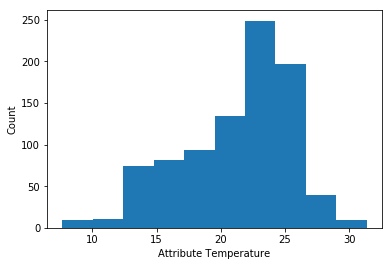

In [55]:
df_t2['temperature'].fillna(df_t2.temperature.median(),inplace=True)
plt.hist(df_t2.temperature)
plt.ylabel("Count")
plt.xlabel("Attribute Temperature")

Text(0.5, 0, 'Attribute Temperature')

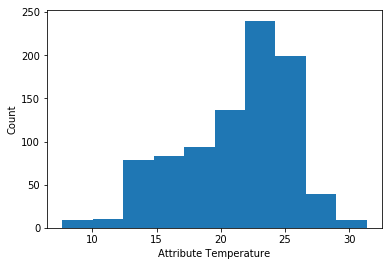

In [56]:
df_t3['temperature'].interpolate(method='linear',inplace=True)
plt.hist(df_t3.temperature)
plt.ylabel("Count")
plt.xlabel("Attribute Temperature")

In [57]:
sid=np.unique(df['stationid'])

In [60]:
sid

array(['t10', 't11', 't12', 't13', 't14', 't15', 't6', 't7', 't8', 't9'],
      dtype=object)

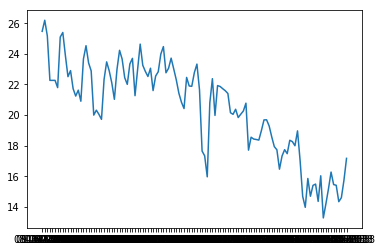

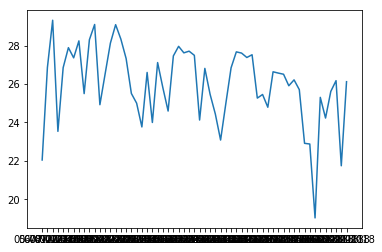

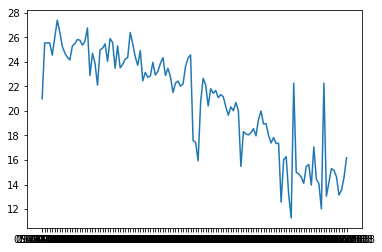

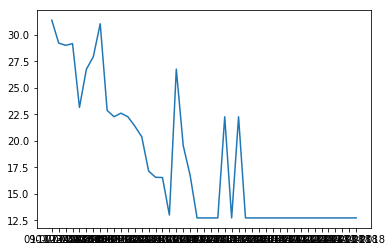

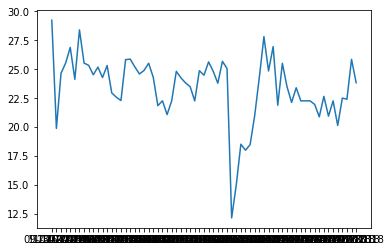

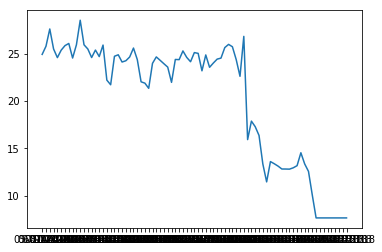

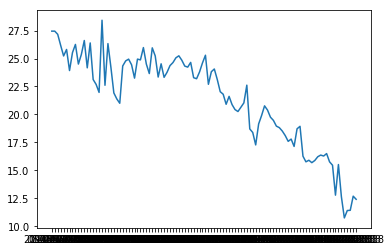

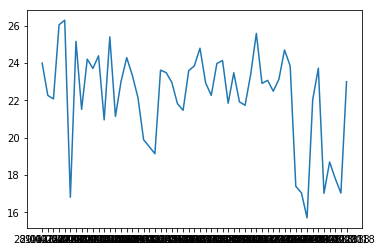

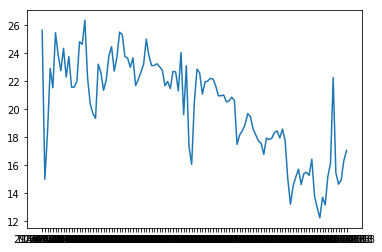

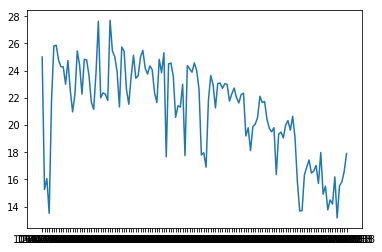

In [61]:
for i in sid:
    plt.plot(df.dates[df.stationid==i],df.temperature[df.stationid==i])
    plt.show()

In [62]:
df.dates[df.stationid==i]

810    10-07-2018
811    12-07-2018
813    15-07-2018
814    16-07-2018
815    18-07-2018
816    19-07-2018
817    20-07-2018
818    21-07-2018
819    22-07-2018
820    23-07-2018
821    24-07-2018
822    25-07-2018
823    26-07-2018
824    28-07-2018
825    29-07-2018
826    30-07-2018
827    31-07-2018
828    01-08-2018
829    02-08-2018
830    03-08-2018
831    04-08-2018
832    05-08-2018
834    07-08-2018
835    08-08-2018
836    09-08-2018
837    10-08-2018
838    11-08-2018
839    12-08-2018
840    13-08-2018
841    14-08-2018
          ...    
913    25-10-2018
914    26-10-2018
915    27-10-2018
916    28-10-2018
917    29-10-2018
918    30-10-2018
919    31-10-2018
920    01-11-2018
921    02-11-2018
922    03-11-2018
923    04-11-2018
924    05-11-2018
925    06-11-2018
926    07-11-2018
927    08-11-2018
928    09-11-2018
929    10-11-2018
930    11-11-2018
931    12-11-2018
932    13-11-2018
933    14-11-2018
934    15-11-2018
935    16-11-2018
936    17-11-2018
937    18-

In [63]:
df.temperature[df.stationid==i]

810    25.00000
811    15.26437
813    16.06122
814    13.50000
815    21.83333
816    25.81752
817    25.86131
818    24.77941
819    24.28889
820    24.26866
821    23.00000
822    24.72993
823    22.56604
824    20.96552
825    22.26757
826    25.44366
827    24.38806
828    22.26757
829    24.82014
830    24.78723
831    23.62963
832    21.68571
834    21.15267
835    23.83784
836    27.62500
837    22.00000
838    22.36585
839    22.26757
840    21.80000
841    27.70000
         ...   
913    19.32394
914    19.47857
915    19.05147
916    20.00000
917    20.32143
918    19.61429
919    20.63971
920    19.05185
921    15.84672
922    13.67391
923    13.71127
924    16.32857
925    16.90071
926    17.42958
927    16.46429
928    16.61268
929    17.02113
930    15.70213
931    17.97857
932    14.91489
933    15.50000
934    13.75540
935    14.48936
936    14.19424
937    16.18440
938    13.16901
941    15.52482
942    15.81560
943    16.58571
944    17.90000
Name: temperature, Lengt

In [64]:
df.head()

,dates,stationid,dispx,dispy,dispz,temperature,humidity,rain
0,08-07-2018,t10,0.000000,0.000000,0.000000,25.46875,82.18750,6.75
1,09-07-2018,t10,0.000000,0.000000,0.000000,26.19298,83.14912,1761.75
2,10-07-2018,t10,0.000000,0.000000,0.000000,25.17021,85.34043,652.50
3,11-07-2018,t10,-0.002835,0.003721,0.004961,22.26757,87.68657,963.00
4,12-07-2018,t10,-0.002835,0.003721,0.004961,22.26757,87.64615,254.25
